# k-scheduling tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# for setting a single amplitude, below automates this for arbirtrary numbers of amplitudes
n = 4
N = 2**n
k = N//2
marked = sample(range(N), k)

In [3]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1

## IQAE: attempt exponential decay in the number of shots per iteration to account for deeper circuits.

In [5]:
# parameters for IQAE

# amplitudes
n = 4
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'chernoff'
verbose = False

a: 0/16 = 0.0
No-Q IAE estimations: [0.0001950559326605222, 1.9965663615764457e-06, 1.984932078741066e-08, 1.987208867738781e-10, 1.9643057766078433e-12]
Modified IAE estimations: [0.0001870262060145267, 1.98878221547858e-06, 1.9924581062951552e-08, 1.9538609114038383e-10, 1.9556083566672113e-12]
No-Q IAE total queries: 69060064
Modified IAE total queries: 55218688
No-Q IAE epsilons: [0.0001950559326605222, 1.9965663615764457e-06, 1.984932078741066e-08, 1.987208867738781e-10, 1.9643057766078433e-12]
Modified IAE epsilons: [0.0001870262060145267, 1.98878221547858e-06, 1.9924581062951552e-08, 1.9538609114038383e-10, 1.9556083566672113e-12]
Modified wins? True with 20.04% difference


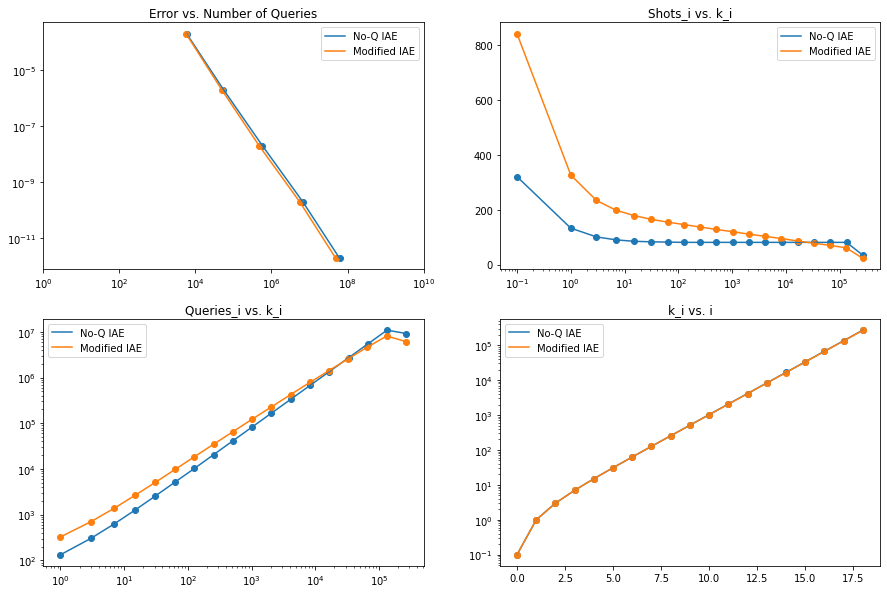

a: 1/16 = 0.0625
No-Q IAE estimations: [0.06257984520392135, 0.062483426190365426, 0.06250844283899273, 0.06250058613083202, 0.06250001254319462]
Modified IAE estimations: [0.06289460208217271, 0.06246252342084294, 0.06251639282328389, 0.06250035900695874, 0.062488254249997335]
No-Q IAE total queries: 202107769
Modified IAE total queries: 152800153
No-Q IAE epsilons: [0.004823133418833697, 0.0004835437376776025, 4.753444466993467e-05, 4.750408946190693e-06, 4.831162346320694e-07]
Modified IAE epsilons: [0.004775224760203565, 0.0004827298585621323, 4.656910457998334e-05, 4.706340892234734e-06, 4.772867712200812e-07]
Modified wins? True with 24.4% difference


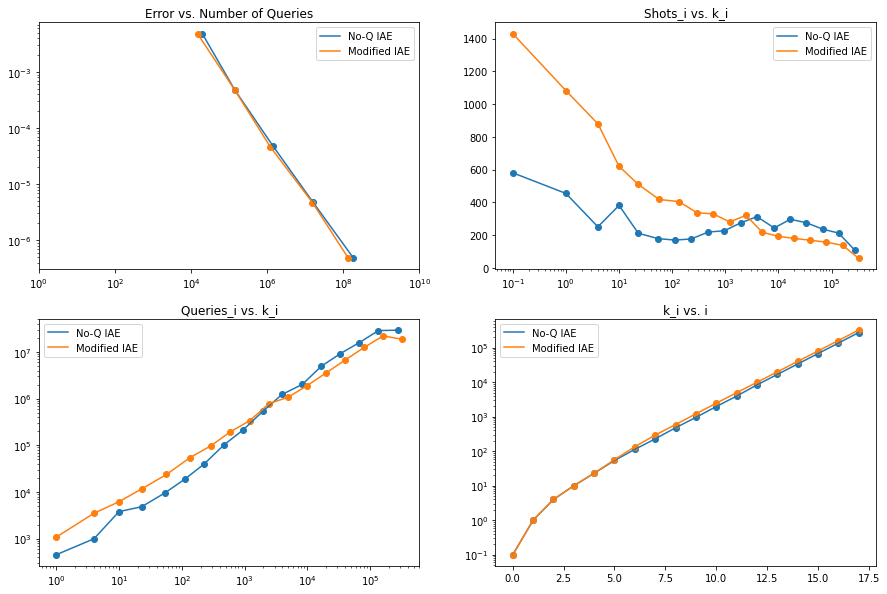

a: 2/16 = 0.125
No-Q IAE estimations: [0.12369829581780561, 0.12498481660448402, 0.12499107293673811, 0.12500019424079556, 0.12500011965768026]
Modified IAE estimations: [0.12446231564448607, 0.12509786225601907, 0.1249882014940299, 0.12500108422665224, 0.12500004796715963]
No-Q IAE total queries: 160732579
Modified IAE total queries: 130935639
No-Q IAE epsilons: [0.0065762938079630615, 0.0006593687583568639, 6.575310922494332e-05, 6.602164308311398e-06, 6.609503842847086e-07]
Modified IAE epsilons: [0.006576477502254353, 0.0006589988339761321, 6.281112346512296e-05, 6.528448202376691e-06, 6.576316314427233e-07]
Modified wins? True with 18.54% difference


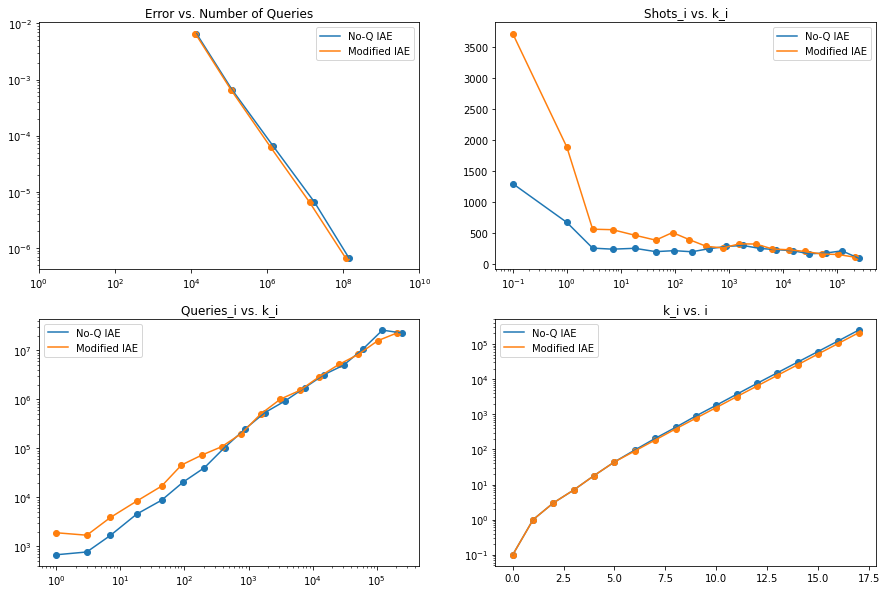

a: 3/16 = 0.1875
No-Q IAE estimations: [0.1857003911779724, 0.18770305172859275, 0.1649979129536896, 0.1875010041812933, 0.18750014627219658]
Modified IAE estimations: [0.18701341595131948, 0.1875920871697832, 0.18748355199959554, 0.1462192650594069, 0.18574481234298235]
No-Q IAE total queries: 160409032
Modified IAE total queries: 84322860
No-Q IAE epsilons: [0.007666233680169415, 0.0007471011894695095, 7.249261006751773e-05, 7.776343051990597e-06, 7.711063028797982e-07]
Modified IAE epsilons: [0.007784207437716101, 0.0007612721163984953, 7.739290721524295e-05, 7.0250370076963e-06, 7.75988630366542e-07]
Modified wins? True with 47.43% difference


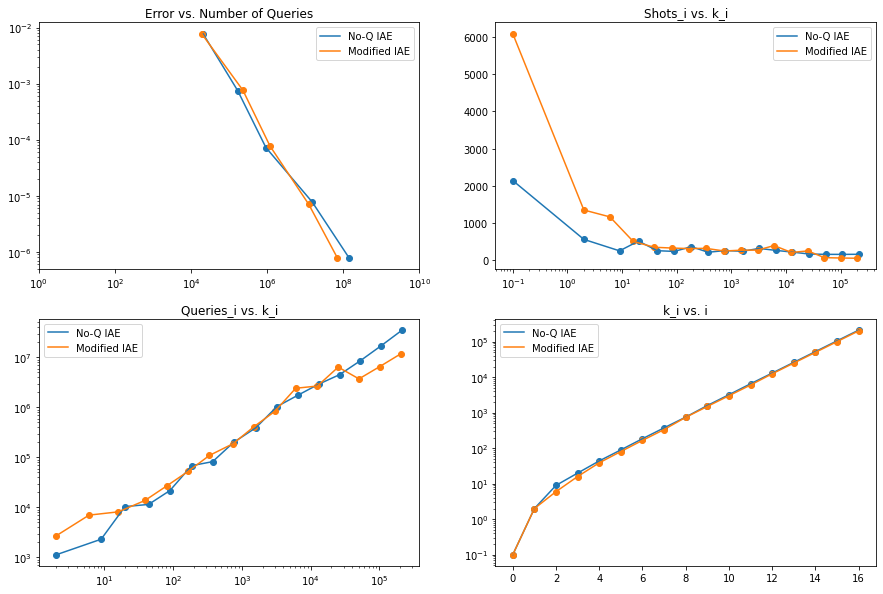

a: 4/16 = 0.25
No-Q IAE estimations: [0.25117448129272635, 0.2498726808287252, 0.24998191707089185, 0.24999794901538477, 0.24985696229013232]
Modified IAE estimations: [0.2500121269208476, 0.2500237414286301, 0.2500063815119756, 0.24945528677196796, 0.2499917001490653]
No-Q IAE total queries: 128334585
Modified IAE total queries: 210765260
No-Q IAE epsilons: [0.008570882047641809, 0.000864255211337886, 8.641539876051707e-05, 8.469359699142531e-06, 8.586350283418254e-07]
Modified IAE epsilons: [0.008591771713779825, 0.0008624920084126658, 8.404054154904916e-05, 8.635042463206455e-06, 8.519319422001237e-07]
Modified wins? False with 64.23% difference


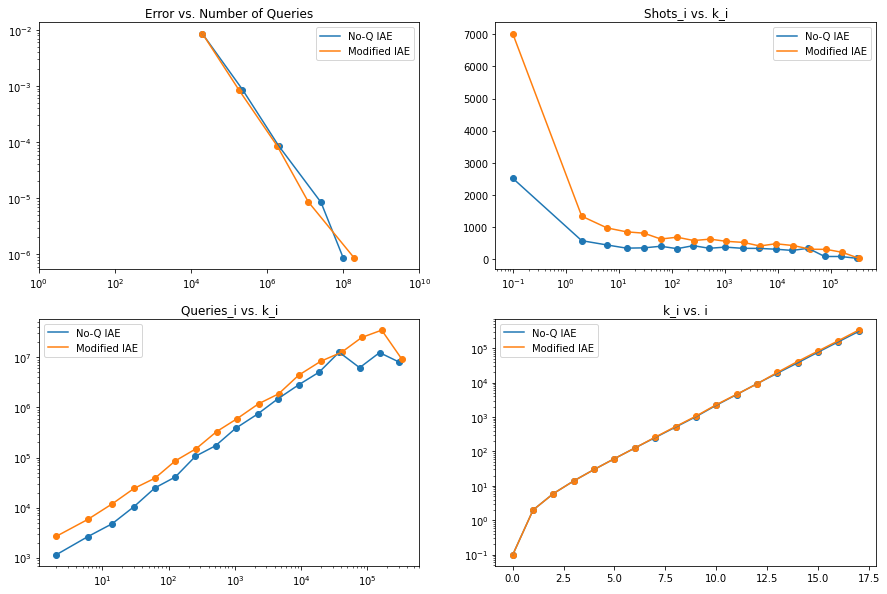

a: 5/16 = 0.3125
No-Q IAE estimations: [0.31378170703637676, 0.31228795356520156, 0.3124830115640058, 0.3125004099558909, 0.312500356348835]
Modified IAE estimations: [0.3132801673474983, 0.3127451591001668, 0.3125032739629161, 0.3124994330857058, 0.31250023928309845]
No-Q IAE total queries: 212351174
Modified IAE total queries: 149316744
No-Q IAE epsilons: [0.009275399458870431, 0.0009107879186861789, 9.227955231499996e-05, 9.039938211941045e-06, 8.875052537049566e-07]
Modified IAE epsilons: [0.009241297219366756, 0.0009253344476515268, 9.239137749939008e-05, 9.091369079755607e-06, 9.22842053191486e-07]
Modified wins? True with 29.68% difference


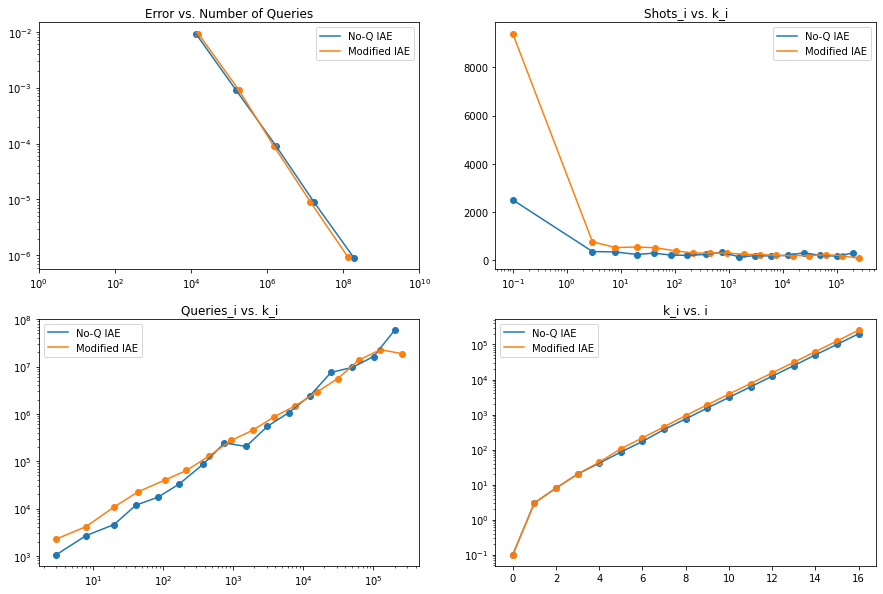

a: 6/16 = 0.375
No-Q IAE estimations: [0.3754837717920937, 0.3749117735387208, 0.3749834452494739, 0.3749992449524658, 0.37500006172843436]
Modified IAE estimations: [0.37553630118084924, 0.3751335190213586, 0.37499830076971996, 0.3749988579495686, 0.3749998814587918]
No-Q IAE total queries: 176523318
Modified IAE total queries: 128529400
No-Q IAE epsilons: [0.009672357142008398, 0.0009660556370656437, 9.6745837391915e-05, 9.593041889965903e-06, 9.668262438145003e-07]
Modified IAE epsilons: [0.009619827753252874, 0.000962587982191343, 9.589766687337353e-05, 9.520285742914414e-06, 9.67683830621624e-07]
Modified wins? True with 27.19% difference


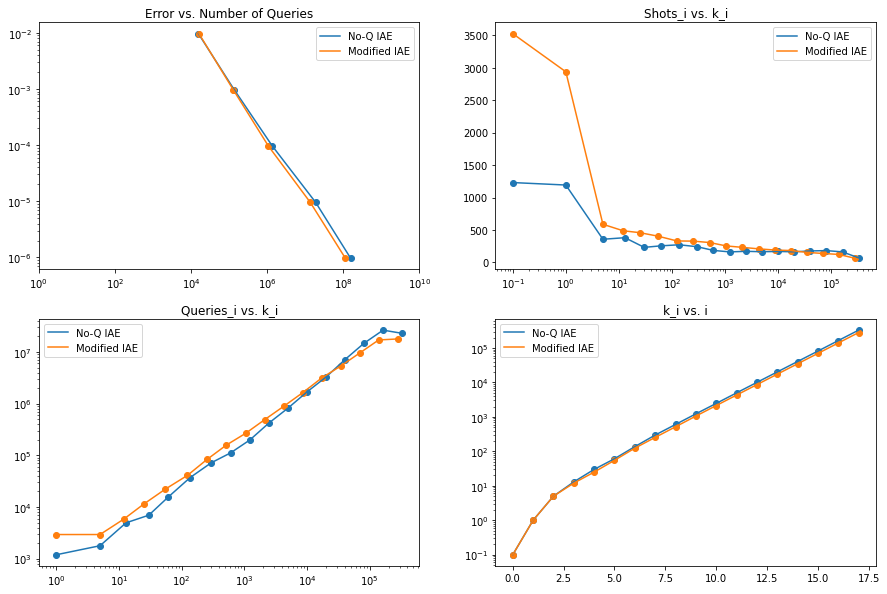

a: 7/16 = 0.4375
No-Q IAE estimations: [0.43603737888396665, 0.43751213946930084, 0.4375306400721899, 0.4374964196929531, 0.4374999872492542]
Modified IAE estimations: [0.4378483140697753, 0.4374636195877707, 0.43752309763421304, 0.43466966318393546, 0.43470656841449884]
No-Q IAE total queries: 177490671
Modified IAE total queries: 122615665
No-Q IAE epsilons: [0.009860660885207317, 0.0009903906079448688, 9.90782567368842e-05, 9.797085686547025e-06, 9.841755219675008e-07]
Modified IAE epsilons: [0.009879945226551168, 0.0009885163667975316, 9.896239516535288e-05, 9.834381045348284e-06, 9.657686410868838e-07]
Modified wins? True with 30.92% difference


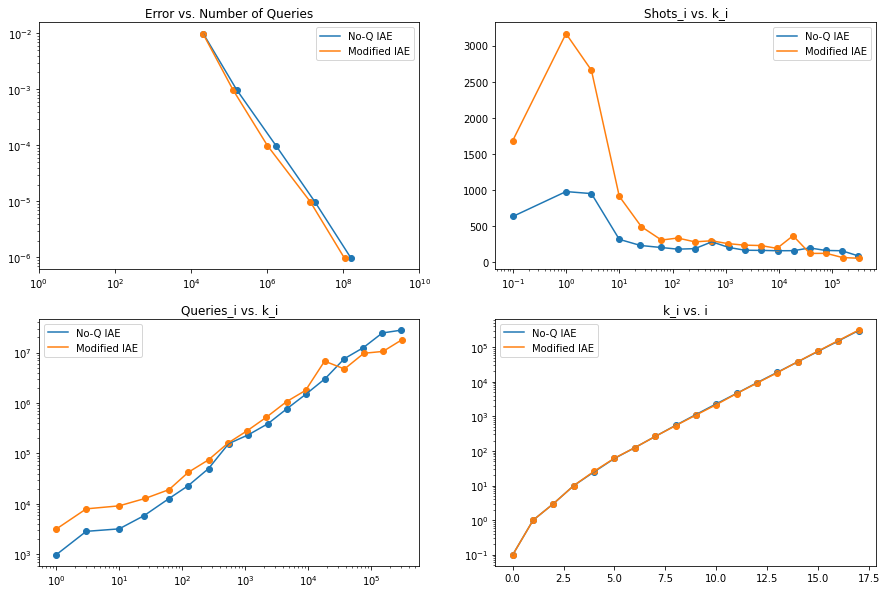

a: 8/16 = 0.5
No-Q IAE estimations: [0.5024778163738106, 0.499980463632402, 0.5000190393926122, 0.5000016213721805, 0.49999971807939864]
Modified IAE estimations: [0.49747561002920526, 0.5001288782060063, 0.4999797456540017, 0.5000017768409404, 0.5000002781480409]
No-Q IAE total queries: 189569093
Modified IAE total queries: 139290204
No-Q IAE epsilons: [0.00998752949522591, 0.000999475628600921, 9.984451988628851e-05, 9.896249841878646e-06, 9.619736234811604e-07]
Modified IAE epsilons: [0.009940955898241843, 0.0009969662703996907, 9.965384154819734e-05, 9.768547851174425e-06, 9.659074642343057e-07]
Modified wins? True with 26.52% difference


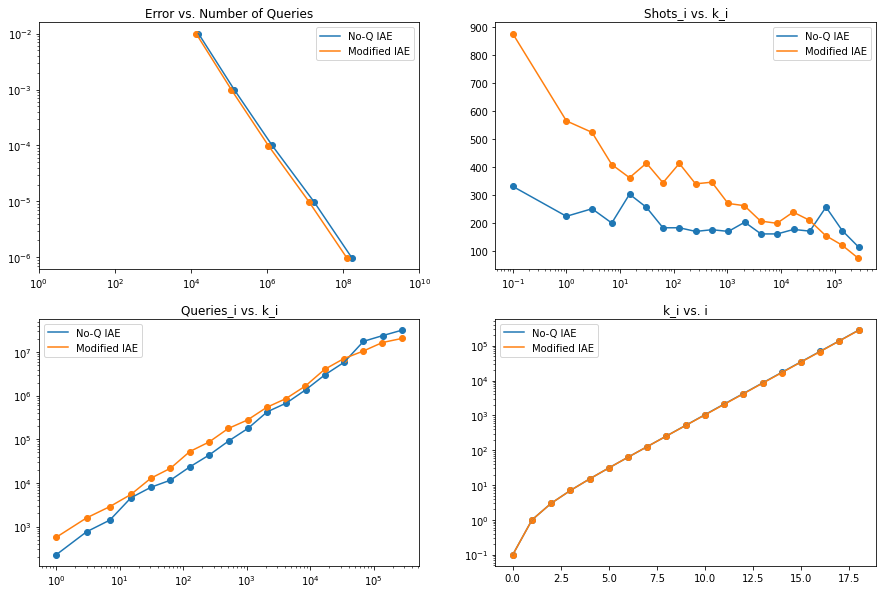

a: 9/16 = 0.5625
No-Q IAE estimations: [0.5655337431356097, 0.5623328625647179, 0.5624820375078405, 0.5625030382195466, 0.5625000393529934]
Modified IAE estimations: [0.566816881277622, 0.5622973538772591, 0.562488427263222, 0.5624997253932783, 0.5624997611813802]
No-Q IAE total queries: 189373830
Modified IAE total queries: 127789661
No-Q IAE epsilons: [0.009635901225382493, 0.0009848679219938705, 9.895181304403478e-05, 9.551509066174635e-06, 9.88230614451524e-07]
Modified IAE epsilons: [0.009878946161720636, 0.0009861084871100045, 9.901038651299876e-05, 9.860206288125895e-06, 9.83804939458377e-07]
Modified wins? True with 32.52% difference


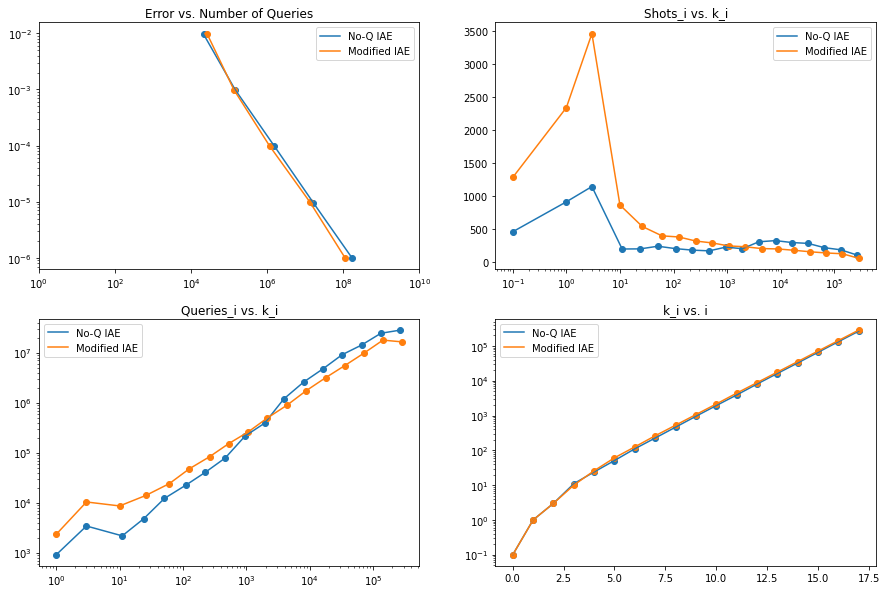

a: 10/16 = 0.625
No-Q IAE estimations: [0.6245152898851856, 0.624666636781765, 0.6249929643264591, 0.6250012802394957, 0.6250001094925877]
Modified IAE estimations: [0.6271660976423488, 0.6249133752280602, 0.624983442785674, 0.6250002745716265, 0.6250001031815131]
No-Q IAE total queries: 198183437
Modified IAE total queries: 153152655
No-Q IAE epsilons: [0.009671418819288069, 0.0009505243093279048, 9.6788132135317e-05, 9.65037033678895e-06, 9.64126639357854e-07]
Modified IAE epsilons: [0.00966539739369271, 0.0009640732897956972, 9.636042132582512e-05, 9.591801690078672e-06, 9.673167304380392e-07]
Modified wins? True with 22.72% difference


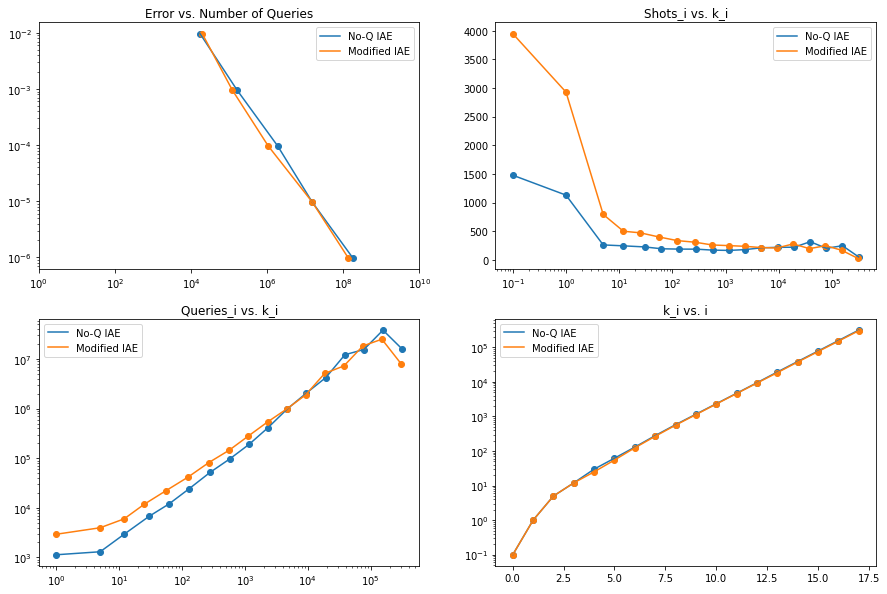

a: 11/16 = 0.6875
No-Q IAE estimations: [0.6879062643203262, 0.6875319377597615, 0.6801276792698152, 0.6875013793075886, 0.6872618627495053]
Modified IAE estimations: [0.6864160229933853, 0.6876083789949032, 0.6875047240176829, 0.6874973883936246, 0.6875001846976693]
No-Q IAE total queries: 203650140
Modified IAE total queries: 126247097
No-Q IAE epsilons: [0.009244978528987313, 0.000921998545485303, 9.237348462215467e-05, 9.211166831557538e-06, 8.880555310564198e-07]
Modified IAE epsilons: [0.009252423607832183, 0.0009219821599355527, 9.071486589040667e-05, 9.251378467300952e-06, 9.127991061896878e-07]
Modified wins? True with 38.01% difference


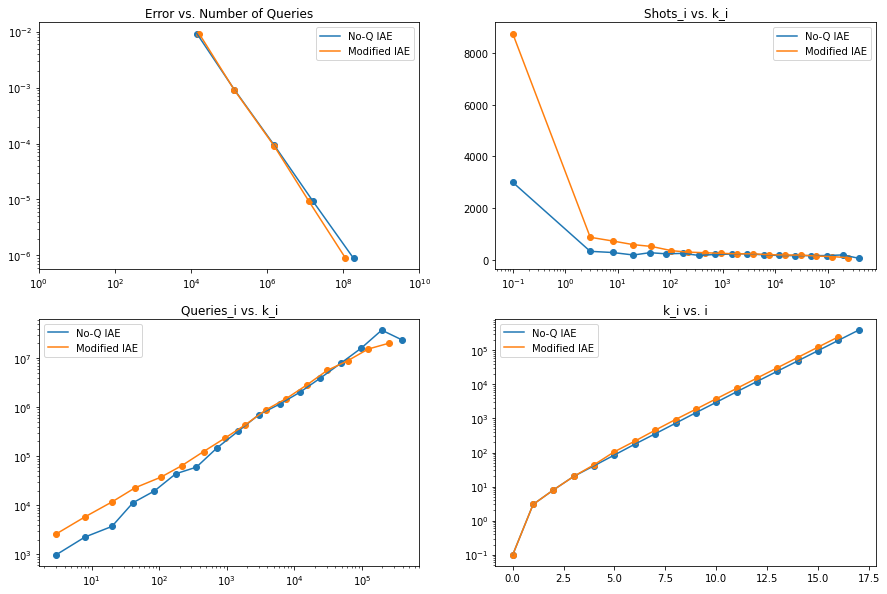

a: 12/16 = 0.75
No-Q IAE estimations: [0.748990883585374, 0.7500127682022502, 0.7494615432891624, 0.7493749232242605, 0.7499998658814984]
Modified IAE estimations: [0.7504717203244241, 0.7500146021419785, 0.7499729920350819, 0.7499977859793203, 0.7499999574223193]
No-Q IAE total queries: 275139627
Modified IAE total queries: 224225233
No-Q IAE epsilons: [0.008613204141232289, 0.0008640003428366794, 8.640730672826447e-05, 8.48788742258133e-06, 8.611279740944333e-07]
Modified IAE epsilons: [0.008619777403562234, 0.0008619634096569961, 8.650496329626334e-05, 8.644791159972964e-06, 8.659850086467635e-07]
Modified wins? True with 18.5% difference


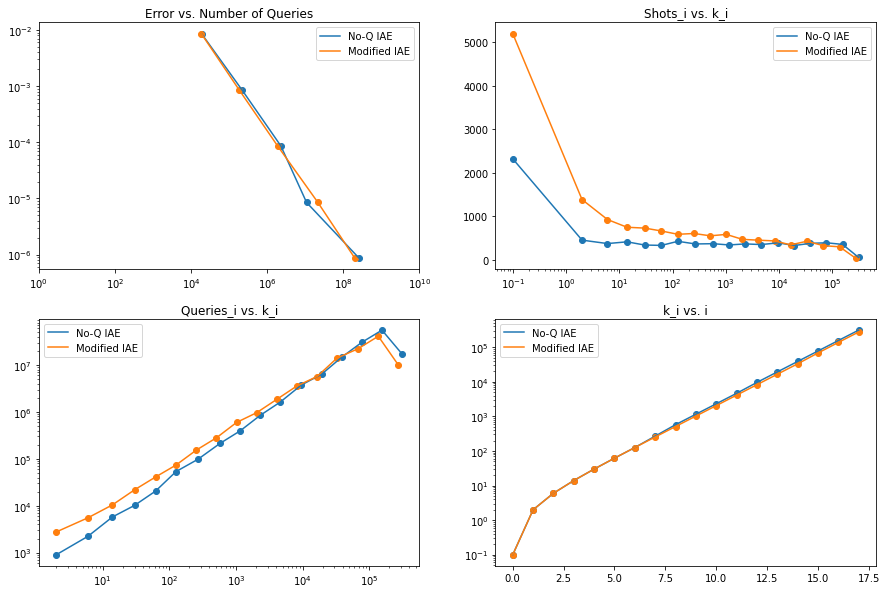

a: 13/16 = 0.8125
No-Q IAE estimations: [0.8109332015243125, 0.8125593158756652, 0.8125171844593486, 0.8124978369994849, 0.8125001175482156]
Modified IAE estimations: [0.8109380586514767, 0.8125238101676255, 0.8124629448246653, 0.8125025160666985, 0.8125002080610098]
No-Q IAE total queries: 167206928
Modified IAE total queries: 184484783
No-Q IAE epsilons: [0.007820496040993719, 0.000763596321901705, 7.718153044722342e-05, 7.79391637933946e-06, 7.730080572865283e-07]
Modified IAE epsilons: [0.007825353168157911, 0.0007789092382587959, 7.738211957186714e-05, 7.693702490818577e-06, 7.794773096425622e-07]
Modified wins? False with 10.33% difference


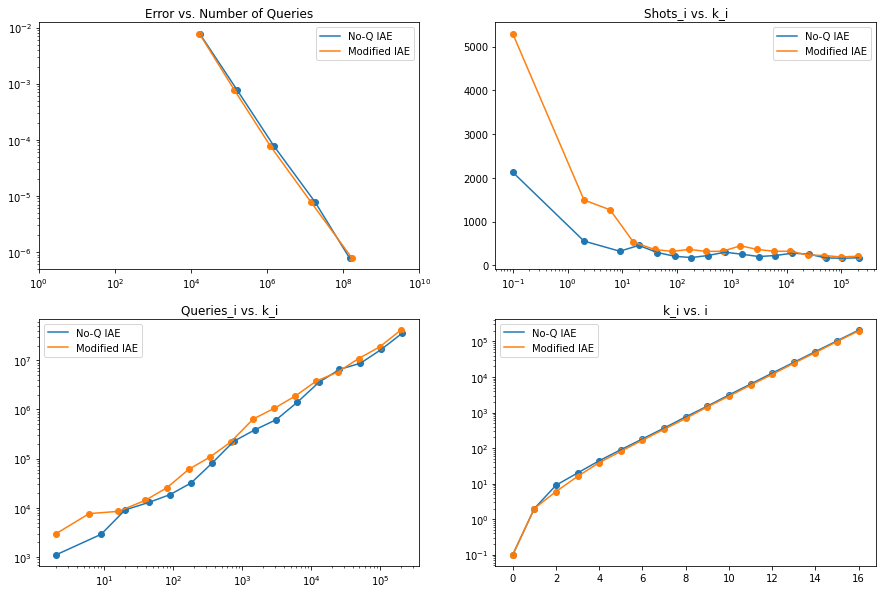

a: 14/16 = 0.875
No-Q IAE estimations: [0.8755043790558311, 0.875182270124524, 0.8750026694578146, 0.8750012680203352, 0.875000139312664]
Modified IAE estimations: [0.8726622994032318, 0.8750294517378006, 0.8749962615786335, 0.8749991989644885, 0.8750001746640589]
No-Q IAE total queries: 206968279
Modified IAE total queries: 171990381
No-Q IAE epsilons: [0.006596133303755525, 0.0006608806977107529, 6.562863310616285e-05, 6.607619133958131e-06, 6.613080704154228e-07]
Modified IAE epsilons: [0.006656056885994077, 0.0006602843271955039, 6.417236025585416e-05, 6.546695917264422e-06, 6.425663738873766e-07]
Modified wins? True with 16.9% difference


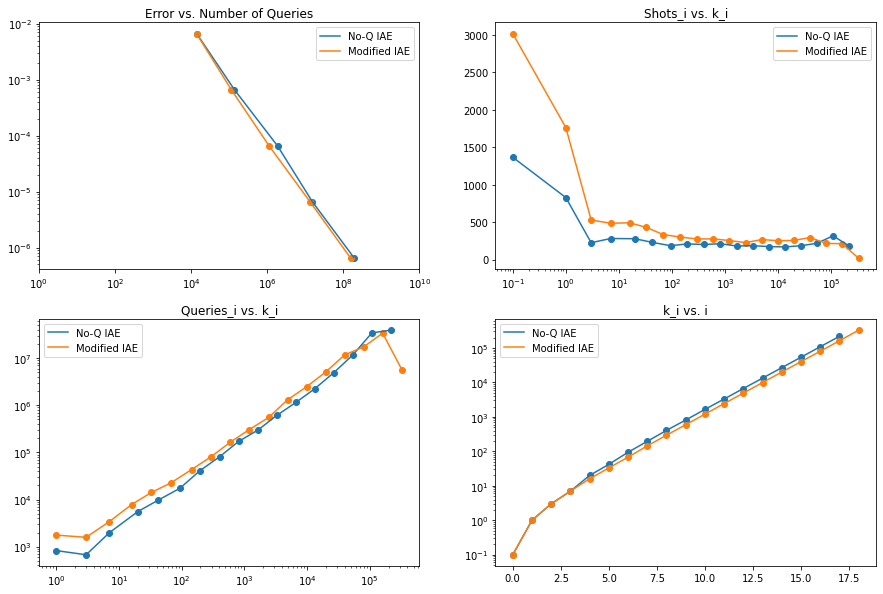

a: 15/16 = 0.9375
No-Q IAE estimations: [0.9369036305497698, 0.9376797337573577, 0.9375044557473414, 0.9375002013335347, 0.9374999644875706]
Modified IAE estimations: [0.9371053979178272, 0.9375686470367395, 0.9371822383660782, 0.9375007941260665, 0.9374999568527873]
No-Q IAE total queries: 164549407
Modified IAE total queries: 132421395
No-Q IAE epsilons: [0.004853878506795917, 0.00048321982029980726, 4.7948845007139695e-05, 4.831857467690881e-06, 4.773062159402208e-07]
Modified IAE epsilons: [0.004775224760203645, 0.00048152003028834045, 4.81056102974442e-05, 4.758266448134929e-06, 4.793903034538971e-07]
Modified wins? True with 19.52% difference


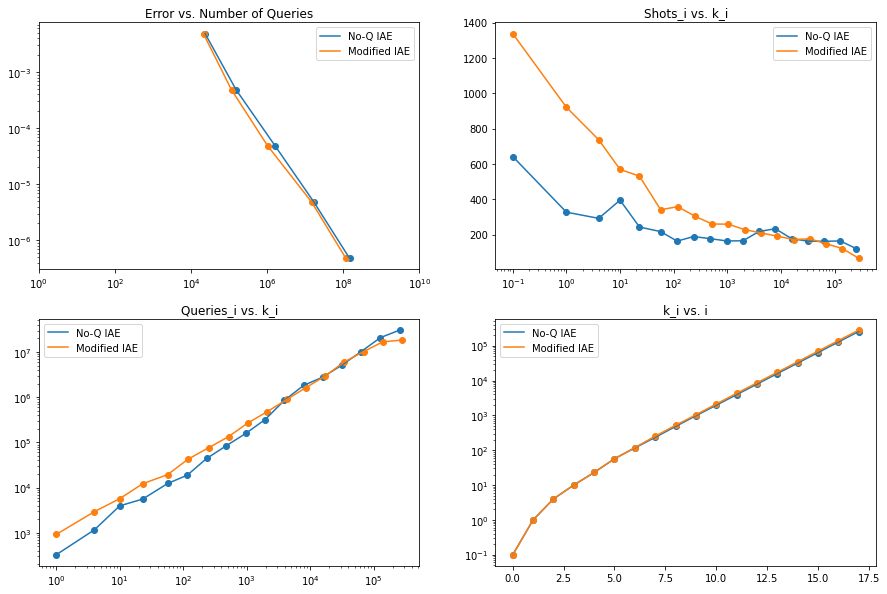

a: 16/16 = 1.0
No-Q IAE estimations: [0.9998049440673396, 0.9999980034336384, 0.9999999801506793, 0.9999999998012791, 0.9999999999980357]
Modified IAE estimations: [0.9998129737939854, 0.9999980112177845, 0.999999980075419, 0.999999999804614, 0.9999999999980443]
No-Q IAE total queries: 69060064
Modified IAE total queries: 55218688
No-Q IAE epsilons: [0.0001950559326604484, 1.9965663616283713e-06, 1.9849320742615362e-08, 1.9872092860140356e-10, 1.9643175974692895e-12]
Modified IAE epsilons: [0.00018702620601457332, 1.9887822154673884e-06, 1.9924580985097862e-08, 1.953860406800345e-10, 1.9556578578772132e-12]
Modified wins? True with 20.04% difference


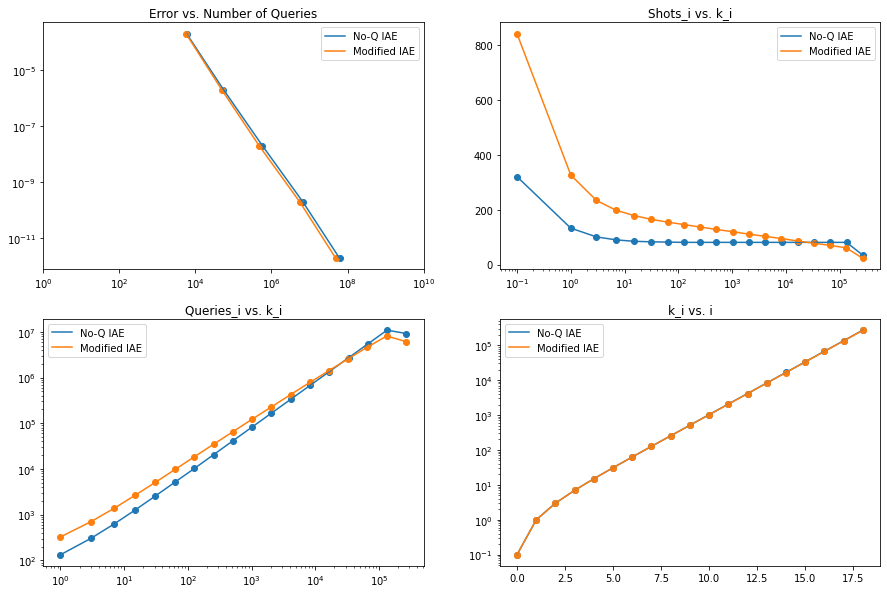

% modified > original: 0.8823529411764706


In [6]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

wins = matches = 0

ki = 0
while ki <= k:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), ki)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    miae_results = [] 
    iae_results = []
    
    for i, epsilon in enumerate(epsilons):
        if verbose:
            print('ε:',epsilon)
            
        MIAE = NoQuantumIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                           alpha=alpha, 
                                           confint_method=confint_method, 
                                           quantum_instance=aer_sim)
        
        IAE = ModifiedIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                alpha=alpha, 
                                                confint_method=confint_method, 
                                                quantum_instance=aer_sim)
        
        exprs = ['No-Q IAE', 'Modified IAE']
        
        # configure the number of shots this way and pray that it works
        MIAE._quantum_instance._run_config.shots = shots
        IAE._quantum_instance._run_config.shots = shots
        
        # for recording intermediate algo results
        state = defaultdict(dict)
        state2 = defaultdict(dict)
        
        miae_result = MIAE.estimate(problem,
                                    state=state,
                                    k0=ki,
                                    N=N,
                                    verbose=verbose)
        
        iae_result = IAE.estimate(problem2,
                                  state=state2,
                                  verbose=False)
        
        miae_results.append(miae_result)
        iae_results.append(iae_result)
        if verbose:
            print()
    
    # process results
    miae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in miae_results]
    miae_nshots_i  = [res.num_oracle_queries for res in miae_results]

    iae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in iae_results]
    iae_nshots_i  = [res.num_oracle_queries for res in iae_results]
    
    print(f'a: {ki}/{N} = {ki/N}')
    print(f'{exprs[0]} estimations:', [res.estimation for res in miae_results])
    print(f'{exprs[1]} estimations:', [res.estimation for res in iae_results])
    
    miae_total_queries, iae_total_queries = sum(miae_nshots_i), sum(iae_nshots_i)
    print(f'{exprs[0]} total queries:', miae_total_queries)
    print(f'{exprs[1]} total queries:', iae_total_queries)
    
    print(f'{exprs[0]} epsilons:', miae_epsilon_i)
    print(f'{exprs[1]} epsilons:', iae_epsilon_i)
    
    diff = round(abs(iae_total_queries - miae_total_queries) / miae_total_queries * 100, 2)
    print('Modified wins?', iae_total_queries < miae_total_queries, f'with {diff}% difference')
    
    wins += int(iae_total_queries < miae_total_queries)
    matches += 1
    
    # graph k_i vs num_shots
    def process_state(state):
        if len(state) == 0: return [],[]
        round_shots = state['round_shots']
        queries = state['n_queries']
        shots_at_k0 = round_shots.pop(0)
        queries_at_k0 = queries.pop(0)
    
        k_i = [k for k in round_shots]
        queries_i = [queries[k] for k in k_i]
        shots_i = [shots_at_k0] + [round_shots[k] for k in k_i]
    
        k_i.insert(0, 0.1)
        
        return shots_i, queries_i, k_i
    
    mod_shots, mod_queries, mod_k = process_state(state)
    base_shots, base_queries, base_k = process_state(state2)

    fig,axs = plt.subplots(2,2,figsize=(15,10))
    
    # plot query complexity
    
    axs[0,0].set_yscale('log')
    axs[0,0].set_xscale('log')
    axs[0,0].set_xlim(1, 10**10)
    axs[0,0].set_title('Error vs. Number of Queries')
    
    axs[0,0].scatter(miae_nshots_i, miae_epsilon_i)
    axs[0,0].plot(miae_nshots_i, miae_epsilon_i)
    axs[0,0].scatter(iae_nshots_i, iae_epsilon_i)
    axs[0,0].plot(iae_nshots_i, iae_epsilon_i)
    
    axs[0,0].legend(exprs)
    
    # plots for shots vs k
    axs[0,1].set_xscale('log')
    axs[0,1].set_title('Shots_i vs. k_i')
    
    axs[0,1].plot(mod_k, mod_shots)
    axs[0,1].scatter(mod_k, mod_shots)
    axs[0,1].plot(base_k, base_shots)
    axs[0,1].scatter(base_k, base_shots)
    
    axs[0,1].legend(exprs)
    
    # plots for nqueries vs k
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_title('Queries_i vs. k_i')
    
    axs[1,0].plot(mod_k[1:], mod_queries)
    axs[1,0].scatter(mod_k[1:], mod_queries)
    axs[1,0].plot(base_k[1:], base_queries)
    axs[1,0].scatter(base_k[1:], base_queries)
    
    axs[1,0].legend(exprs)
    
    # plots for k
    axs[1,1].set_yscale('log')
    axs[1,1].set_title('k_i vs. i')
    
    axs[1,1].plot(mod_k)
    axs[1,1].scatter(range(len(mod_k)), mod_k)
    axs[1,1].plot(base_k)
    axs[1,1].scatter(range(len(base_k)), base_k)
    
    axs[1,1].legend(exprs)
    
    plt.show()
    
    # save results for epsilon vs nshots
    miae_nshots.append(miae_nshots_i)
    miae_epsilon.append(miae_epsilon_i)
    iae_nshots.append(iae_nshots_i)
    iae_epsilon.append(iae_epsilon_i)
    ki += 1
    
iae_nshots = np.array(iae_nshots)
print('% modified > original:', wins/matches)

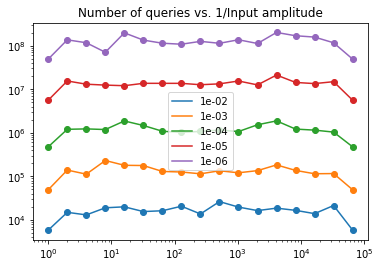

In [7]:
for i in range(len(epsilons)):
    plt.plot(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
    plt.scatter(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])

plt.title('Number of queries vs. 1/Input amplitude')
plt.legend(['{:.0e}'.format(eps) for eps in epsilons])
plt.xscale('log')
plt.yscale('log')

plt.show()